# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [16]:
# your code here- numerical variable
titanic.select_dtypes([int,float]).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [17]:
#your code here- categorical variable
titanic.select_dtypes(object).columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [21]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12, 6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

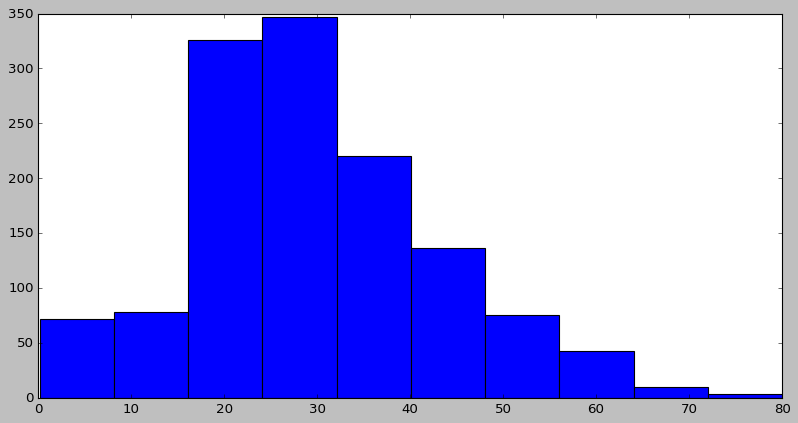

In [23]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12, 6))
plt.hist(titanic['Age'])

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

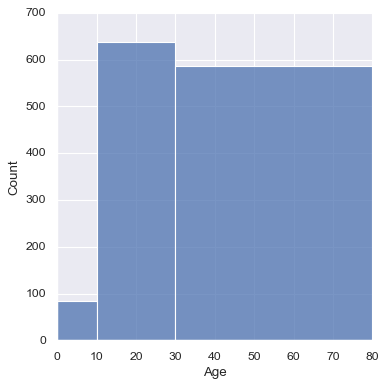

In [34]:
# your code here
sns.set_theme(style='darkgrid')
sns.displot(titanic.Age, bins=[0,10,30,80], height=5, aspect=1)

#### Whether the bin size affects your plot? Why?

In [2]:
#your comment here
# it seems as is it loaded to the last block of the graph, when the actual distribution is more loaded to the bin between 10 and 30

#### Use seaborn to show the distribution of the column `Age`

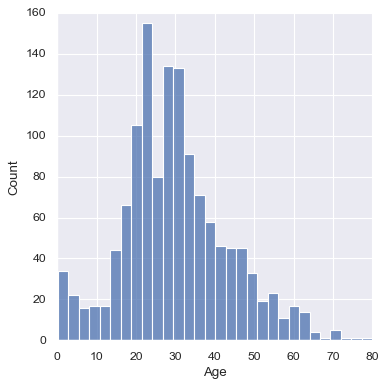

In [37]:
# your code here
sns.displot(titanic.Age);

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

<AxesSubplot:ylabel='None'>

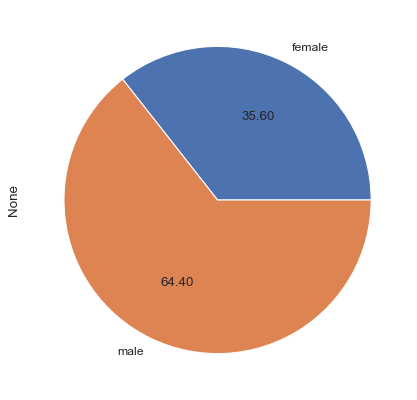

In [44]:
# your code here- 1st way
titanic.groupby('Gender').size().plot(kind='pie', autopct='%.2f')

<AxesSubplot:xlabel='Gender'>

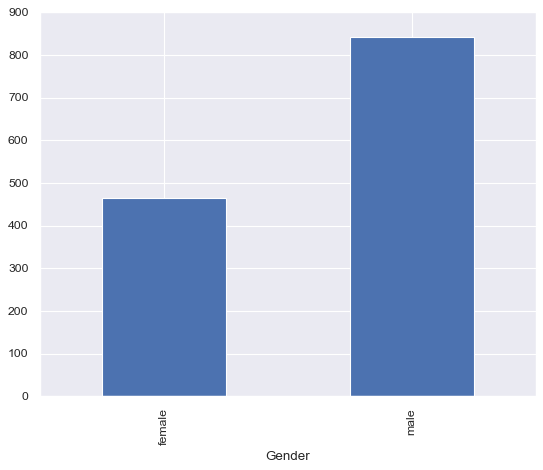

In [48]:
# your code here- 2nd way
titanic.groupby('Gender').size().plot(kind='bar')

#### Use the appropriate plot to visualize the column `Pclass` 


In [51]:
titanic.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

3    709
1    323
2    277
Name: Pclass, dtype: int64
AxesSubplot(0.2125,0.1;0.6x0.8)


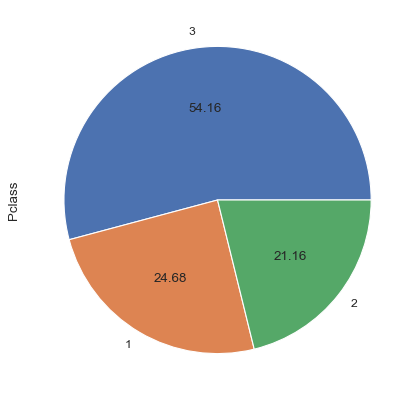

In [56]:
# your code here
print(titanic.Pclass.value_counts())
print(titanic.Pclass.value_counts().plot(kind='pie', autopct='%.2f'))

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64
28.5


<AxesSubplot:>

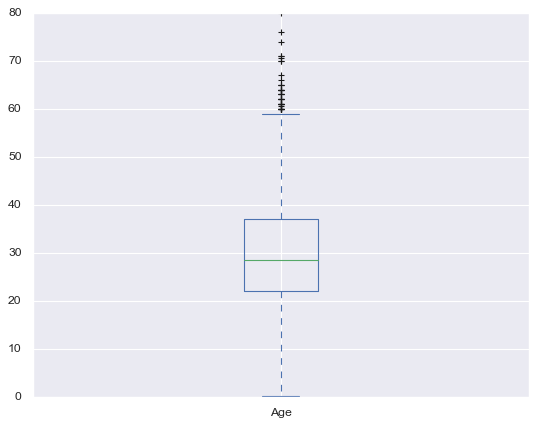

In [67]:
# your code here
print(titanic.Age.describe())
print(titanic.Age.median())
titanic['Age'].plot(kind='box')

#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here
# seems like a normal distibution with some outliers and extremes on the upper side, after the 60 years

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

<AxesSubplot:>

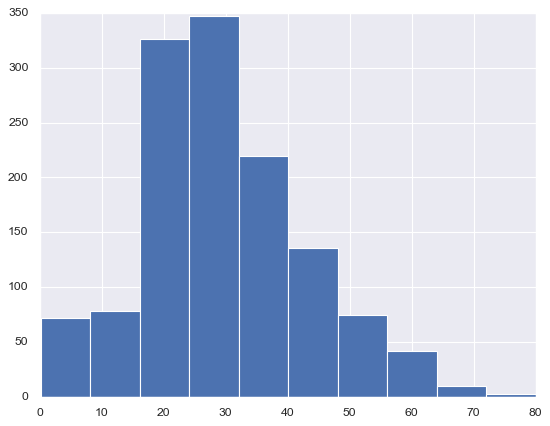

In [68]:
#your code here
titanic.Age.hist()

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here
# confirm the analysis from the previous graph

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

C:\Users\52551\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


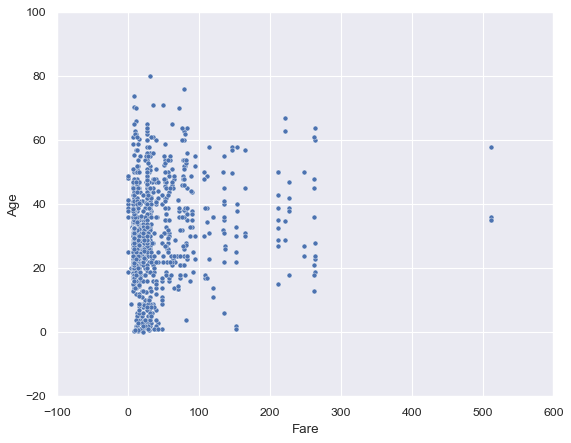

In [105]:
#your code-1st way
sns.scatterplot(titanic.Fare, titanic.Age);

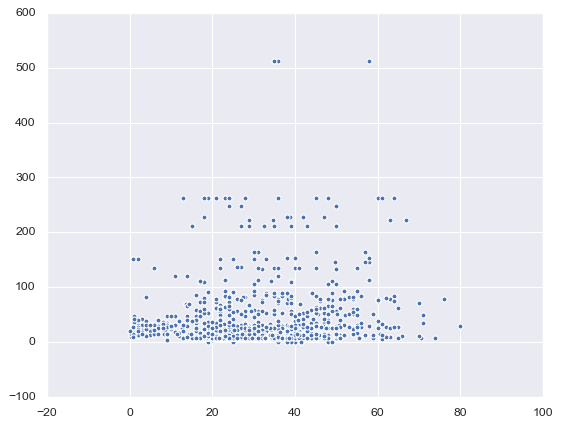

In [106]:
# your code-2nd way
plt.scatter(titanic.Age, titanic.Fare)

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

C:\Users\52551\AppData\Local\Temp\ipykernel_18916\2924942826.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(titanic.corr(), dtype=np.bool) # creo una "máscara" de zeros en bool = False del tamaño del df.corr


<AxesSubplot:>

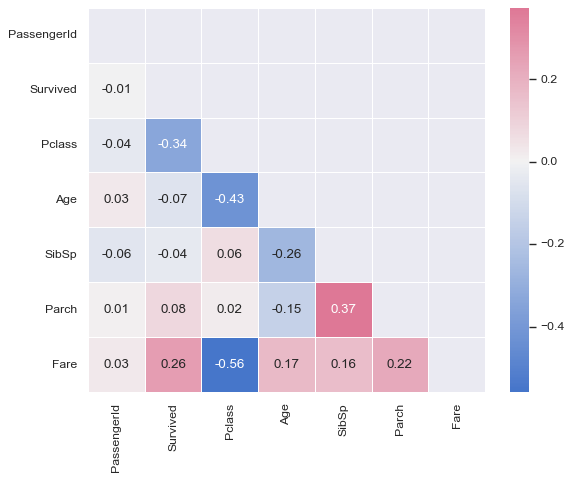

In [113]:
#your code here
mask = np.zeros_like(titanic.corr(), dtype=np.bool) # creo una "máscara" de zeros en bool = False del tamaño del df.corr
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(255, 0, as_cmap=True) # rango de la paleta de colores, el "as_cmap=True" lo hace degradado
sns.heatmap(titanic.corr(), mask=mask, cmap=cmap, center=0, linewidths=0.5, annot=True, fmt='.2f')


#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here


#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

Passenger Class: 3


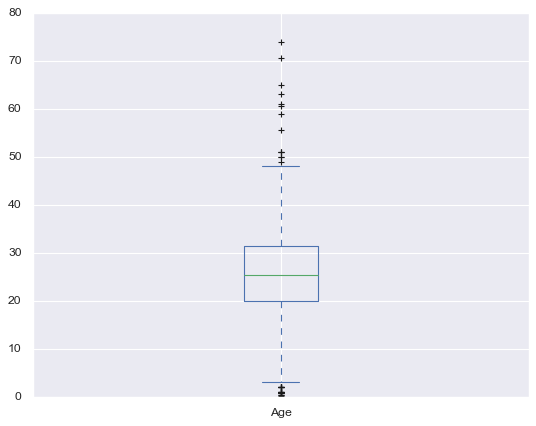

Passenger Class: 1


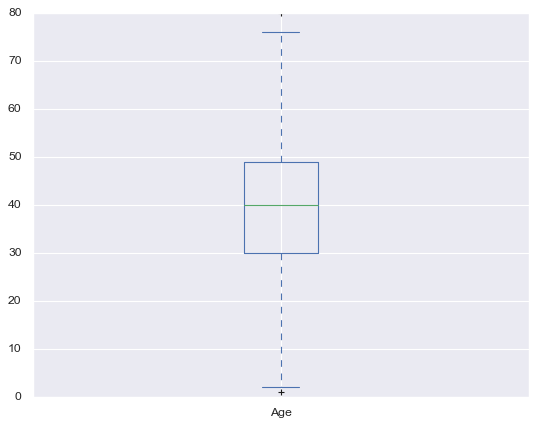

Passenger Class: 2


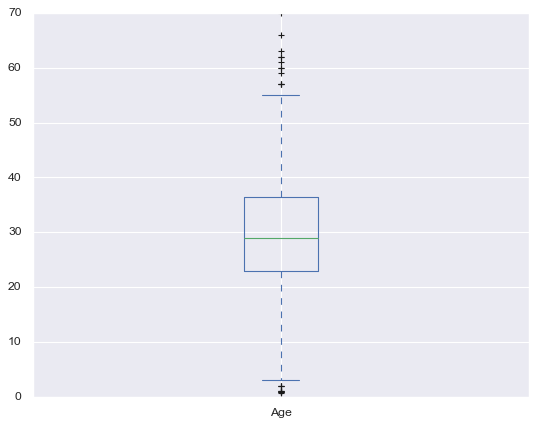

In [84]:
for i in titanic.Pclass.unique():
    print('Passenger Class: '+str(i))
    titanic[titanic.Pclass == i].loc[:,'Age'].plot(kind='box')
    plt.show()


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

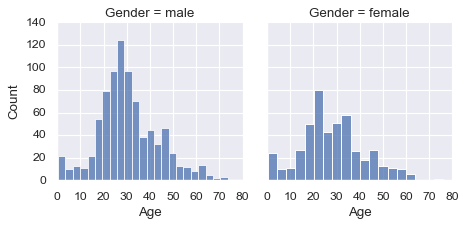

In [101]:
#your code here
sns.FacetGrid(titanic, col='Gender').map(sns.histplot, 'Age')

Passenger Class: 3


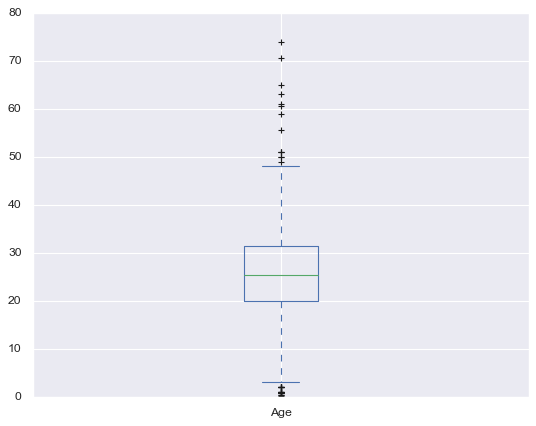

Passenger Class: 1


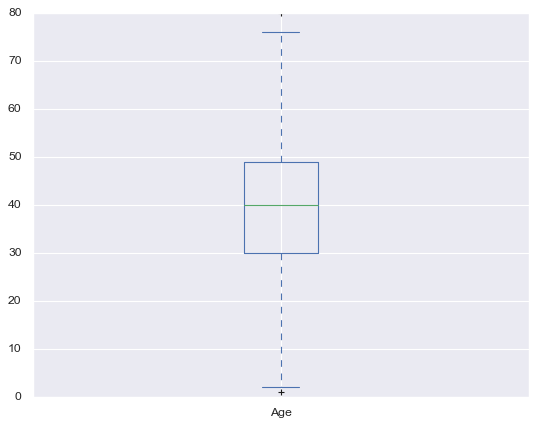

Passenger Class: 2


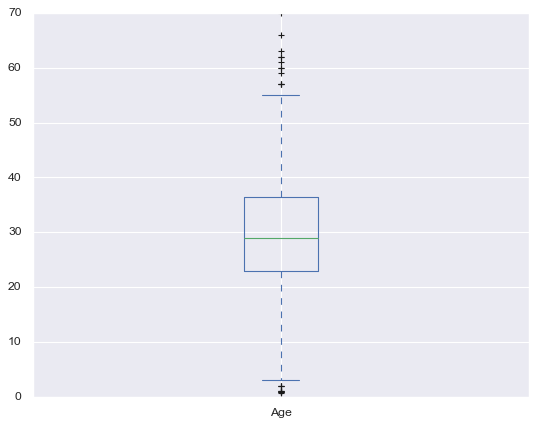

In [100]:
for i in titanic.Pclass.unique():
    print('Passenger Class: '+str(i))
    titanic[titanic.Pclass == i].loc[:,'Age'].plot(kind='box')
    plt.show()